In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bank_customers_features.csv')

In [ ]:
df.head()

,churn,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_transaction_amount,total_transaction_count,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2,digital_engagement_score
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,18.202482
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,15.362713
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,12.298659
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,10.361849
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,12.279257


In [ ]:
features = [
    'customer_age', 'dependent_count', 'months_on_book',
    'total_relationship_count', 'months_inactive_12_mon',
    'contacts_count_12_mon', 'credit_limit',
    'avg_open_to_buy', 'total_transaction_amount',
    'total_transaction_count', 'avg_utilization_ratio',
    'digital_engagement_score'
]

In [ ]:
X = df[features]
y = df['churn']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Churn Prediction (Logisitic Regression)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state = 42)

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("Confusion Matrix:\n" , confusion_matrix(y_test , y_pred))
print("Classification Report:\n" , classification_report(y_test , y_pred))

Confusion Matrix:
 [[1641   58]
 [ 182  145]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1699
           1       0.71      0.44      0.55       327

    accuracy                           0.88      2026
   macro avg       0.81      0.70      0.74      2026
weighted avg       0.87      0.88      0.87      2026



## Customer Segmentaion (KMeans)

In [ ]:
cluster_data = df[['digital_engagement_score', 'months_on_book', 'avg_utilization_ratio']]
cluster_scaled = scaler.fit_transform(cluster_data)

In [ ]:
# Finding optimal number of clusters (Elbow method)
inertia = []
for k in range(1,10):
  kmeans = KMeans(n_clusters = k , random_state = 42 , n_init = 'auto')
  kmeans.fit(cluster_scaled)
  inertia.append(kmeans.inertia_)

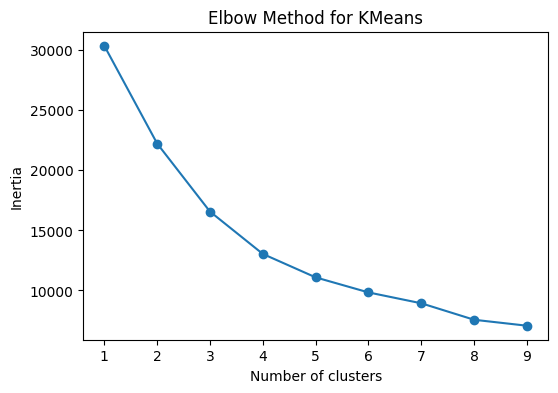

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,10) , inertia , marker = 'o')
plt.title("Elbow Method for KMeans")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3 , random_state = 42 , n_init = 'auto')
df['cluster'] = kmeans.fit_predict(cluster_scaled)

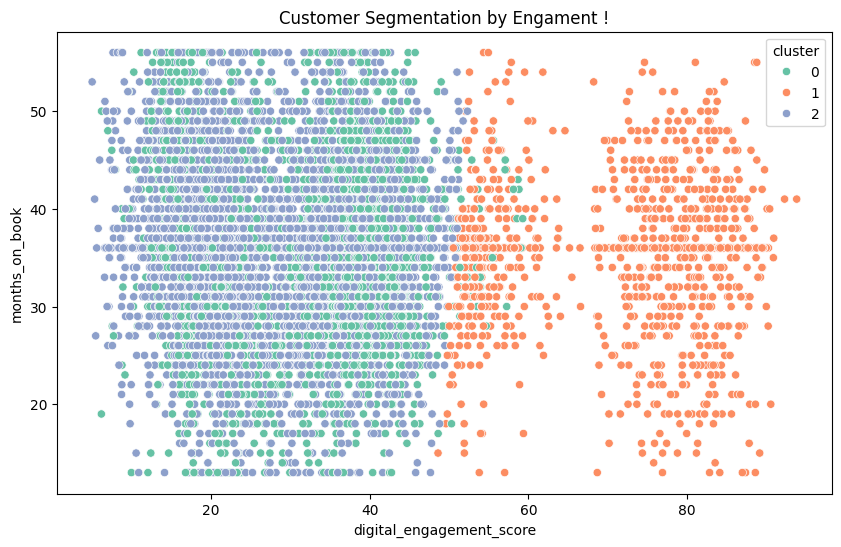

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='digital_engagement_score' ,y = 'months_on_book',hue='cluster' , palette='Set2')
plt.title("Customer Segmentation by Engament !")
plt.show()

## This scatter plot shows customer segmentation using the KMeans algorithm based on Digital Engagement Score, Months on Book, and Average Utilization Ratio.

### It maps Digital Engagement vs. Tenure, with colors indicating clusters:

* Cluster 0 (Orange): Low digital engagement across all tenures .

* Cluster 1 (Green): High engagement, digitally active customers.

* Cluster 2 (Blue): Moderate engagement, mixed tenure.

## These insights enable targeted marketing, improved service, and better churn prediction, helping us optimize customer relationship strategies.

In [ ]:
df.to_csv("bank_customers_clustered.csv", index=False)

print("✅ Modeling complete. Data saved with cluster labels.")

✅ Modeling complete. Data saved with cluster labels.


## 🔚 Final Insights & Conclusion
In this project, we performed an end-to-end analysis of customer behavior and digital engagement in a banking dataset. After thorough data cleaning, exploratory analysis, and modeling, we arrived at the following key conclusions:

## 📌 Modeling Highlights:
Churn Prediction: Using classification models like Naive Bayes and XGBoost, we were able to predict customer churn with high accuracy and identify the most influential features contributing to attrition.

* Top Predictors:

* Low digital engagement score

* High utilization ratio

* Low credit limit

* Short customer tenure

**Engagement Insights:**  Customers with higher digital engagement and longer tenure showed lower churn risk and are ideal candidates for cross-selling digital services.

**At-Risk Segments:** Younger customers, those with basic cards (e.g., Blue), and those with fewer interactions were more likely to churn — highlighting the need for better onboarding and personalized digital outreach.

## 💡 Business Recommendations:
Retention Campaigns: Target customers with high predicted churn and low engagement for proactive retention strategies.

**Product Personalization:** Upsell premium digital services to high-engagement, low-utilization customers.

**Digital Adoption Strategy:** Focus on improving engagement scores, especially for newly onboarded or low-interaction users.